# Disciplina: Inteligência Artificial

## Professor: Elcio Hideiti Shiguemori, e-mail: elciohs@gmail.com

## Data: 01/12/2018

# Primeira avaliação

In [1]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import time
import subprocess
from bibneural import normalizar, formatar, treinar, treina_melhor, normalizar_ativa, formatar_ativa, ativa, apresenta


# Primeiro passo: selecionar o diretório e planilha com dados dos imóveis

In [2]:
excel_f = r'x.xls'
df = pd.read_excel(excel_f)

# Planilha com os dados do treinamento

In [3]:
df

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,Valor
0,0.023256,0.074996,0.003876,0.111547,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277
1,0.003876,0.111547,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550
2,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880
3,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160
4,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000
5,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579
6,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331
7,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607
8,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607,0.399225,0.379031
9,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607,0.399225,0.379031,0.302326,0.943101


# Segundo Passo: inserir o diretório e planilha com exemplos de validação

In [4]:
excel_v = r'x_valid.xls'
val = pd.read_excel(excel_v)
val


,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,Valor
0,0.023256,0.074996,0.003876,0.111547,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277
1,0.003876,0.111547,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550
2,0.000000,0.004956,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880
3,0.100775,0.443901,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160
4,0.093023,0.415002,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000
5,0.178295,0.627892,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579
6,0.186047,0.271820,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331
7,0.217054,0.198277,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607
8,0.213178,0.507550,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607,0.399225,0.379031
9,0.220930,0.455880,0.344961,0.606160,0.410853,1.000000,0.399225,0.542579,0.341085,0.451331,0.437984,0.535607,0.399225,0.379031,0.302326,0.943101


In [5]:
dados_normaliza=df.append(val)

### normalização automática

In [6]:
(minimo, maximo, df,val) = normalizar(dados_normaliza,df,val)

### formatação dos dados automática


In [7]:
(ent, ent_val, sai, sai_val) = formatar(df, val)

# Terceiro Passo: definir parâmetros da Rede Neural Artificial

Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 50000


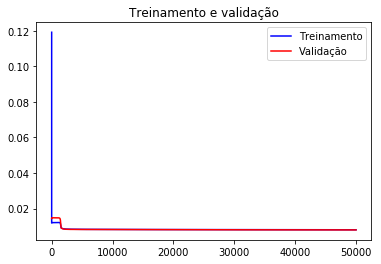


 Erro Quadrático =  0.007965 

 
 
 Deseja treinar mais configuração (s/n)? n


In [8]:
(neuro)=treinar(ent, ent_val, sai, sai_val)

# Quarto Passo: Treinar a rede neural com a melhor configuração

Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 50000


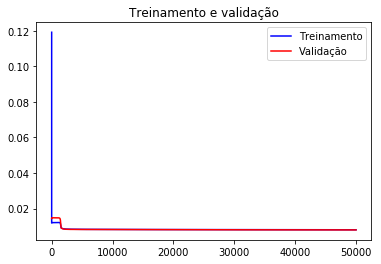


 Erro Quadrático =  0.007965 


In [9]:
(neuro)=treina_melhor(ent, ent_val, sai, sai_val)

# Quarto passo: Avalia o bem

## Carrega planilha Excel contendo os dados a serem avaliados

In [10]:
excel_f1 = r'x_gen.xls'

avalia = pd.read_excel(excel_f1)

avalia

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,Valor
0,0.864341,0.527936,0.841085,0.153918,0.744186,0.235276,0.697674,0.222592,0.651163,0.266404,0.817829,0.311947,0.732558,0.310378,0.658915,0.201051


In [11]:
en_aval = avalia.columns[range(0, avalia.shape[1],1)]
saida_real=pd.DataFrame(avalia,columns=[en_aval[avalia.shape[1]-1]])
avalia=normalizar_ativa (avalia,minimo,maximo)
(ent_avalia, sai_avalia)=formatar_ativa(avalia)

In [12]:
y2=ativa (avalia, ent_avalia, sai_avalia, neuro,minimo, maximo)


In [13]:
en1 = avalia.columns[avalia.shape[1]-1]
saida_avalia=pd.DataFrame(avalia,columns=[en1])

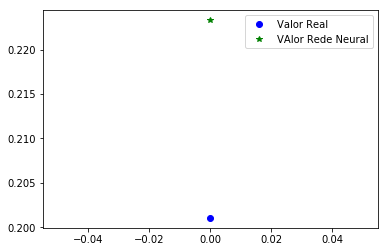


 Valor ofertado = 
 0.201051 

 Estimação da Rede Neural Artificial = 
 0.2233 


In [14]:
apresenta (y2,saida_real)